In [11]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys
from collections import OrderedDict

sys.path.append("..")

In [88]:
# importing the dataset
data = pd.read_csv("data.csv", encoding = "ISO-8859--1")
data['TransactionAmount'] = data['UnitPrice'] * data['Quantity']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [6]:
# example grouping of one unique customer
customers = data.CustomerID.unique()
by_customer = data.groupby(data.CustomerID).get_group(17850.0).drop('CustomerID')
by_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom,-4.95
86899,C543611,21874,GIN AND TONIC MUG,-1,2/10/2011 14:38,1.06,17850.0,United Kingdom,-1.06
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2/10/2011 14:38,2.75,17850.0,United Kingdom,-5.50
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom,-4.95


In [7]:
# num of unique customers
print(len(customers))

4373


In [41]:
# spendings per customer
spendings_per_customer = {}
for i in customers:
    try:
        spendings_per_customer[i] = sum(data.groupby(data.CustomerID).get_group(i)['TransactionAmount'])
    except KeyError:
        print(i)
print(spendings_per_customer)

nan
{17850.0: 5288.630000000009, 13047.0: 3079.1000000000013, 12583.0: 7187.339999999993, 13748.0: 948.2499999999998, 15100.0: 635.1, 15291.0: 4596.510000000002, 14688.0: 5107.379999999999, 17809.0: 4627.619999999998, 15311.0: 59419.34000000011, 14527.0: 7711.379999999953, 16098.0: 2005.6300000000003, 18074.0: 489.6, 17420.0: 598.8300000000002, 16029.0: 50992.60999999997, 16250.0: 389.44000000000005, 12431.0: 6416.389999999999, 17511.0: 88125.37999999996, 17548.0: -141.48000000000002, 13705.0: 711.8600000000001, 13747.0: 79.6, 13408.0: 27487.409999999985, 13767.0: 16945.71000000001, 17924.0: 2894.33, 13448.0: 3465.6700000000023, 15862.0: 832.88, 15513.0: 14520.079999999996, 12791.0: 192.60000000000002, 16218.0: 3054.8700000000013, 14045.0: 1659.75, 14307.0: 2995.7200000000007, 17908.0: 243.2799999999999, 17920.0: 4204.0999999999885, 12838.0: 683.1299999999994, 13255.0: 390.65999999999997, 16583.0: 233.45000000000002, 18085.0: 689.95, 13758.0: 3190.550000000001, 13694.0: 62653.100000000

In [9]:
# highest spending customer
def key_with_max_val(d):
     v = list(d.values())
     k = list(d.keys())
     return k[v.index(max(v))] +': ' + str(d[k[v.index(max(v))]])
key_with_max_val(spendings_per_customer)

OrderedDict([(14213.0, -1192.2000000000003), (12503.0, -1126.0), (15823.0, -840.7600000000001), (16252.0, -295.09000000000003), (12666.0, -227.44), (17307.0, -152.64000000000001), (17548.0, -141.48000000000002), (13958.0, -102.45), (13829.0, -102.0), (16546.0, -95.92999999999981), (13672.0, -71.45999999999998), (18256.0, -50.1), (14437.0, -43.400000000000006), (18141.0, -35.400000000000006), (16262.0, -31.65), (16579.0, -30.599999999999998), (17820.0, -24.049999999999997), (14119.0, -19.9), (14777.0, -17.45), (12870.0, -14.899999999999999), (17547.0, -11.8), (16138.0, -7.95), (12605.0, -7.5), (14679.0, -2.55), (16995.0, -1.25), (14576.0, 35.400000000000006), (17816.0, 36.55999999999999), (12855.0, 38.1), (14589.0, 39.75), (14821.0, 48.800000000000004), (13011.0, 50.550000000000004), (14865.0, 52.2), (15899.0, 56.25), (12665.0, 61.75), (18037.0, 70.02), (18032.0, 73.5), (18050.0, 74.4), (18113.0, 76.32000000000001), (14373.0, 76.55), (13747.0, 79.6), (17752.0, 80.64), (16424.0, 82.56), 

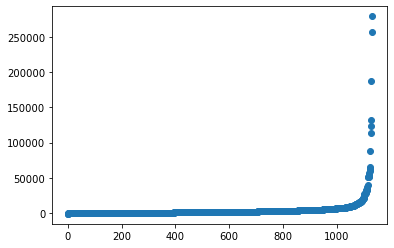

In [39]:
# visualizing spending per customer
ordered = OrderedDict(sorted(spendings_per_customer.items(), key=lambda n: n[1]))
print(len(ordered))
plt.scatter(range(len(ordered)), ordered.values())  # it looks like most customers spend a lot less, whereas there are some who spend a lot, brining up the total transaction amount

In [38]:
# how much of the total transaction values are from the top _x_ spenders?
x = int(input("How many of the top spenders do you want to include?"))
top = sum(list(ordered.values())[-x:])
percentage = ((top / sum(data['TransactionAmount'])) * 100)
print('From ' + str(len(customers)) + ' customers, the top '+ str(x) +' spenders make up ' + str(percentage) + '% of revenue. ')

From 4373 customers, the top 20 spenders make up 18.785741408148766% revenue. 


In [97]:
# what countries are the top _x_ spenders from?
x = int(input("How many of the top spenders do you want to include?"))
countries = {}
c_list = []

def get_country(n):
    return list(data.groupby(data.CustomerID).get_group(n)['Country'])[0]

for country in list(ordered.keys())[-x:]:
    c_list.append(get_country(country))
for country in c_list:
    countries[country] = c_list.count(country)

print(countries)

['United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'France', 'United Kingdom', 'Germany', 'France', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Japan', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Sweden', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'EIRE', 'Australia', 'EIRE', 'United Kingdom', 'United Kingdom', 'Netherlands']
{'United Kingdom': 41, 'France': 2, 'Germany': 1, 'Japan': 1, 'Sweden': 1, 'EIRE': 2, 'Australia': 1, 'Netherlands': 1}


KeyError: 2